<h2 style="color:blue" align="center"> SPARKS FOUNDATION </h2>
<h2 style="color:blue" align="center"> TSF DATA SCIENCE TASK 2</h2>
<h3 style="color:blue" align="center"> PREDICTION USING SUPERVISED ML</h3>
<h3 style="color:blue" align="center"> MARGARET OLUWADARE</h3>
<h3 style="color:blue" align="center"> Data Science and Business Analytics intern at The Sparks Foundation.</h3>


### Flow of Analysis

**1. Import the required libraries** <br>
**2. Exploratory Data Analysis**<br>
**3. Building a clustering model**<br>


**Prediction using Unsupervised ML** 

<p>From the given ‘Iris’ dataset, we will predict the optimum number of clusters and represent it visually.  First we’ll load the iris dataset into a pandas dataframe. Use pandas Python library which provides a data structure, also import seaborn for visualization. sklearn provides the iris species as integer values since this is required for classification of which here we will just add a column with the species names to the dataframe for visualisation.</p>

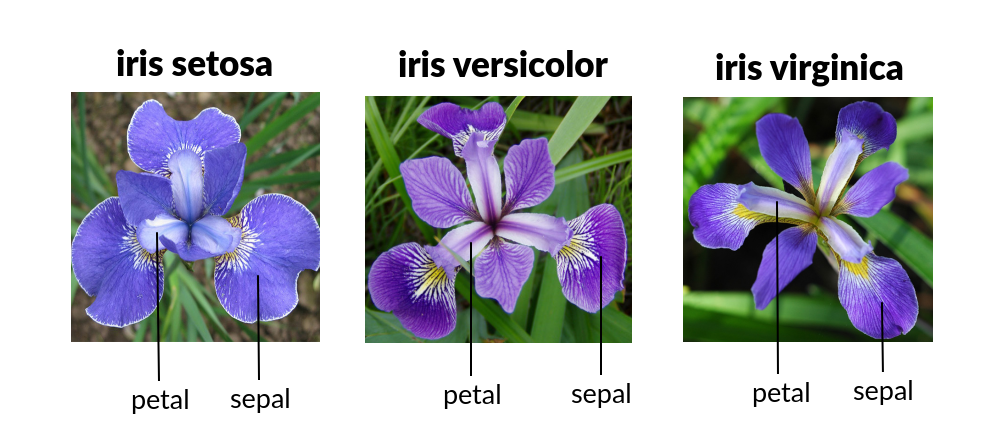

### **1.IMPORTING REQUIRED LIBRARIES**

In [87]:
## For data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import warnings
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from hulearn.experimental.interactive import InteractiveCharts
import bokeh

# for date/time conversion
import datetime as dt

##For data preprocessing
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

## For hyperparameter tuning and modelling
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import scipy.stats as stats

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

## 2. Data Preprocessing and Exploratory Data Analysis

In [4]:
# Reading data from remote link
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data['species'] = np.array([iris.target_names[i] for i in iris.target])
print(data.head(3)) # See the first set of rows

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

In [7]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

<p> From the preprocessing, we notice the data is clean with no missing values or dirty character. Hence there is no need for cleaning. We will perform an EDA to visualise the features.  </p>

In [14]:
## Define a function to perform a 3d visualization of the flowers

def plotchart(clf,x,y):    
    clf = InteractiveCharts(dataf = data, labels='Class')
    clf.add_chart("SepalLength","SepalWidth",legend=False)
    clf.add_chart("PetalLength","PetalWidth",legend=False)

In [17]:
## Perform a 3d scatter plot of the flower
## Define the plot chart
fig = px.scatter_3d(data,x = 'sepal length (cm)', y = 'sepal width (cm)', z = 'petal width (cm)', color='species')
fig.update_layout(title='The Iris Dataset',
                  titlefont=dict({'size':28, 'family': 'Courier New'}),
                  template='plotly',
                  paper_bgcolor='lightgray',
                  width=750, height=550,
                 )
## Insert the data point to produce the chart
fig.update_layout(scene = dict(xaxis = dict(backgroundcolor = "rgba(200,100,140)",
                              gridcolor = "black",
                              showbackground = True,
                              zerolinecolor = "black",),
                 yaxis = dict(backgroundcolor = "rgba(100,200,120)",
                 gridcolor = "black",
                 showbackground = True,
                 zerolinecolor = "black"),
                 zaxis = dict(backgroundcolor = "rgba(200,90,50)",
                             gridcolor = "black",
                             showbackground = True,
                             zerolinecolor = "black"),
                              ),
                 )
fig.show()

<h3> Plot the data point to determine outliers </h3>

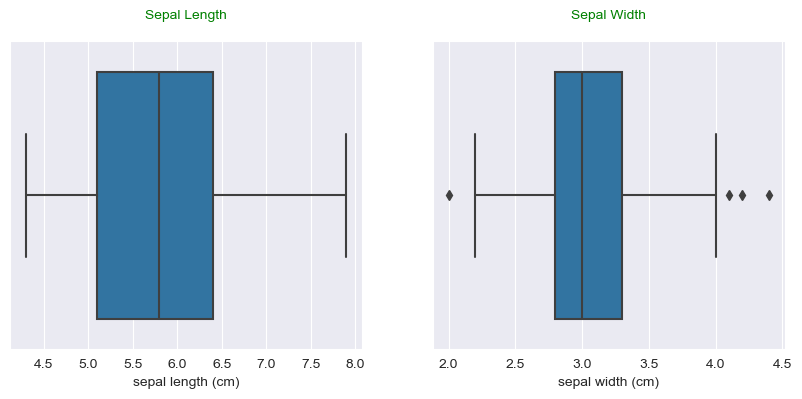

In [23]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.boxplot(data['sepal length (cm)'])
plt.title("Sepal Length\n", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Green'})

plt.subplot(1,2,2)
sns.boxplot(data['sepal width (cm)'])
plt.title("Sepal Width\n", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Green'})

plt.show()

Text(0.5, 1.0, 'Petal Width\n')

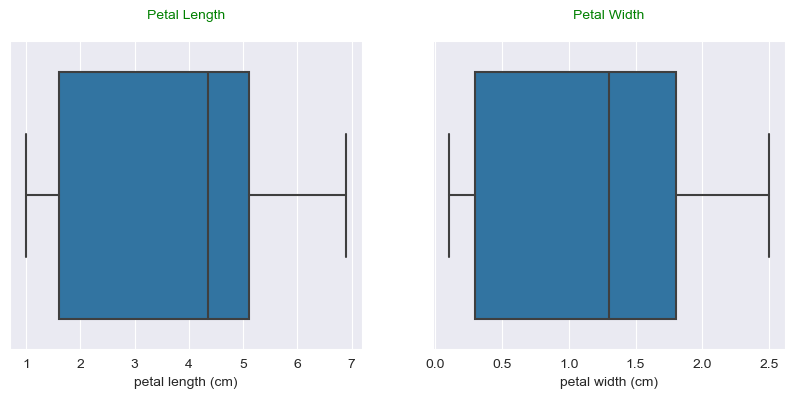

In [25]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(data['petal length (cm)'])
plt.title("Petal Length\n", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Green'})

plt.subplot(1,2,2)
sns.boxplot(data['petal width (cm)'])
plt.title("Petal Width\n", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Green'})

<h3> Univariate and Multivaraite Analysis </h3>

<p> We will perform univariate and multivariate analusis to see the behaviour and interaction of the features. From the plot the following can be observed

* The sepal length display a bell shaped distribution with almost a flat bed
* The Sepal width is a peaked bell-shaped distribution.
* The Petal measurements have a double bell shaped distribution </p>

'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'

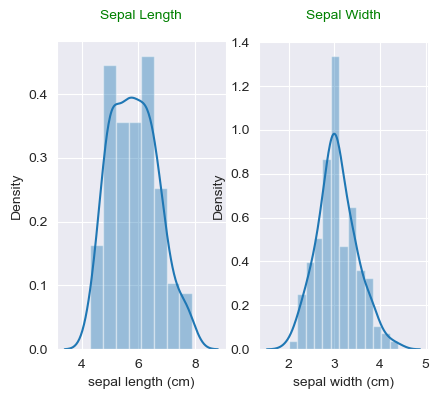

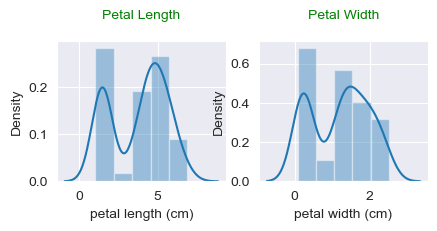

In [30]:
plt.figure(figsize=(10,4))

plt.subplot(1,4,1)
sns.distplot(data['sepal length (cm)'])
plt.title("Sepal Length\n", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Green'})

plt.subplot(1,4,2)
sns.distplot(data['sepal width (cm)'])
plt.title("Sepal Width\n", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Green'})
plt.show()

plt.figure(figsize=(10,4))

plt.subplot(2,4,1)
sns.distplot(data['petal length (cm)'])
plt.title("Petal Length\n", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Green'})

plt.subplot(2,4,2)
sns.distplot(data['petal width (cm)'])
plt.title("Petal Width\n", fontdict={'fontsize': 10, 'fontweight' : 3, 'color' : 'Green'})

plt.show()

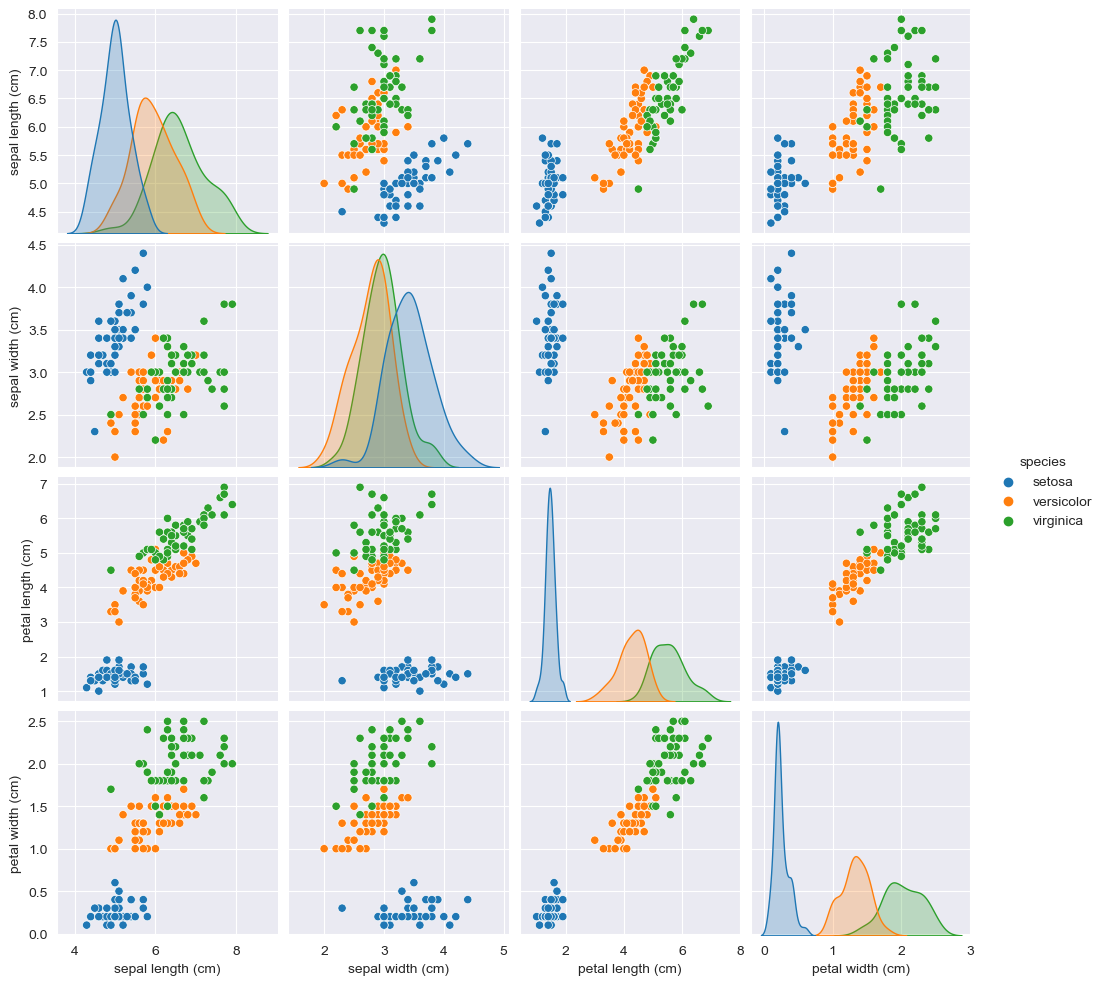

In [31]:
sns.pairplot(data, hue='species')

In [35]:
dat = data.drop(['species'],axis = 1)

def makeplots(col):
    
    plt.figure(figsize=(15,7))
    plt.subplot(1,3,1)
    plt.hist(data[col], color='salmon')
    
    plt.subplot(1,3,2)
    stats.probplot(data[col], dist='norm', plot=plt)
    
    
    plt.subplot(1,3,3)
    sns.boxplot(data[col], color='pink')
    plt.show()

 Statistical Plots for the Feature : sepal length (cm) are shown ↓


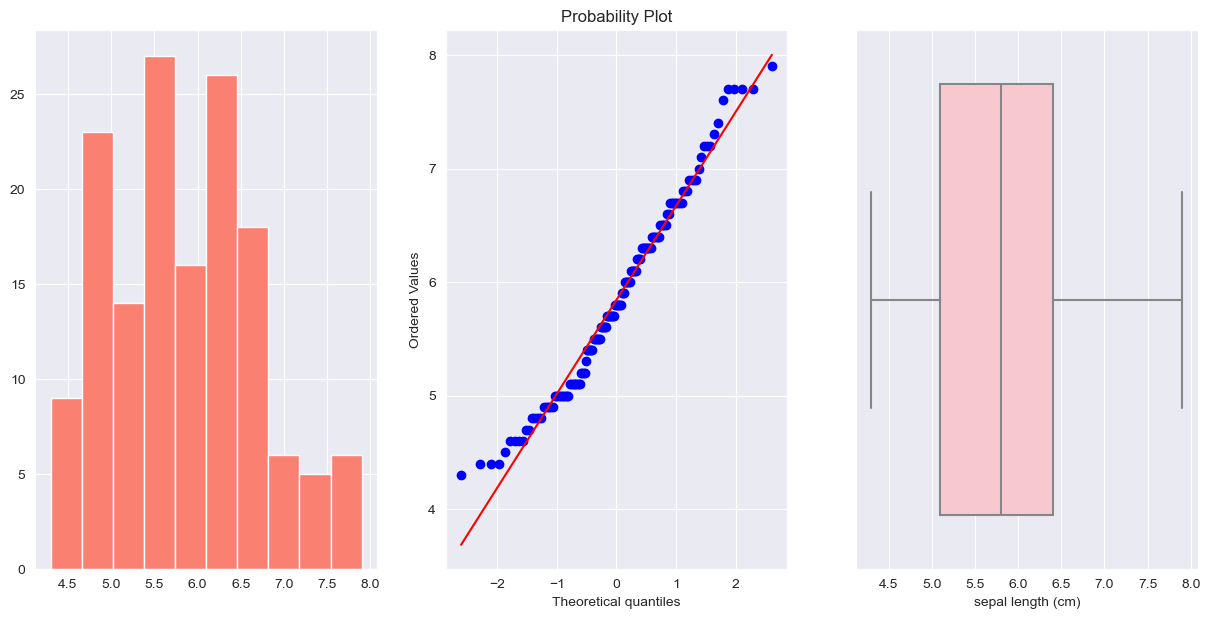

------------------------------------------------------------
 Statistical Plots for the Feature : sepal width (cm) are shown ↓


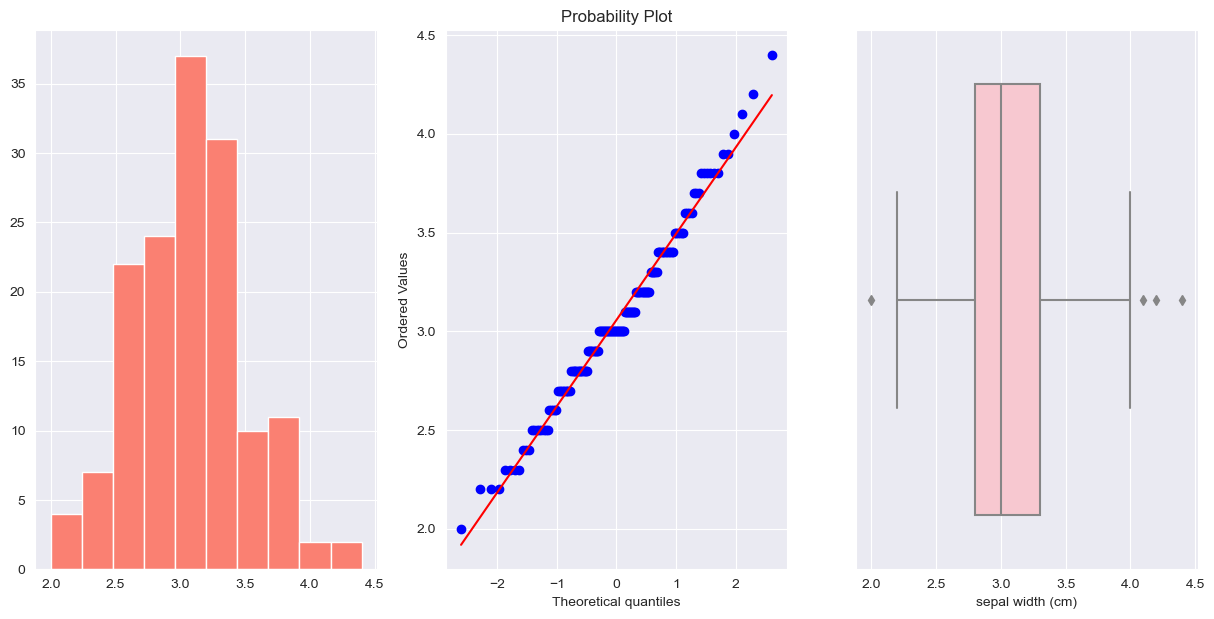

------------------------------------------------------------
 Statistical Plots for the Feature : petal length (cm) are shown ↓


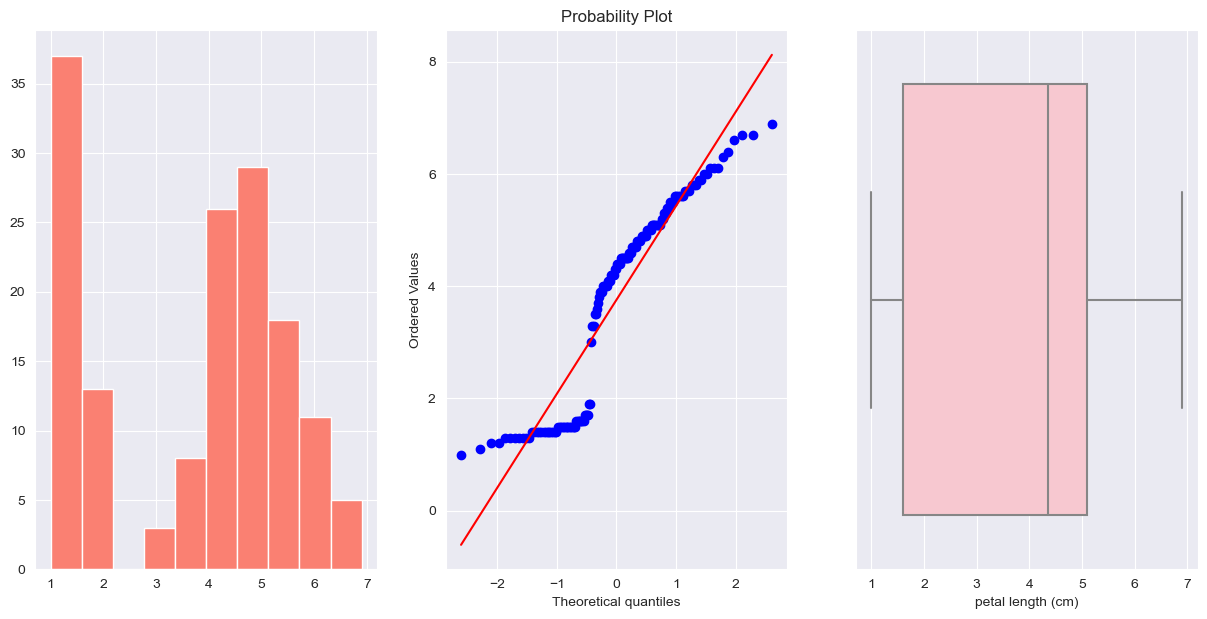

------------------------------------------------------------
 Statistical Plots for the Feature : petal width (cm) are shown ↓


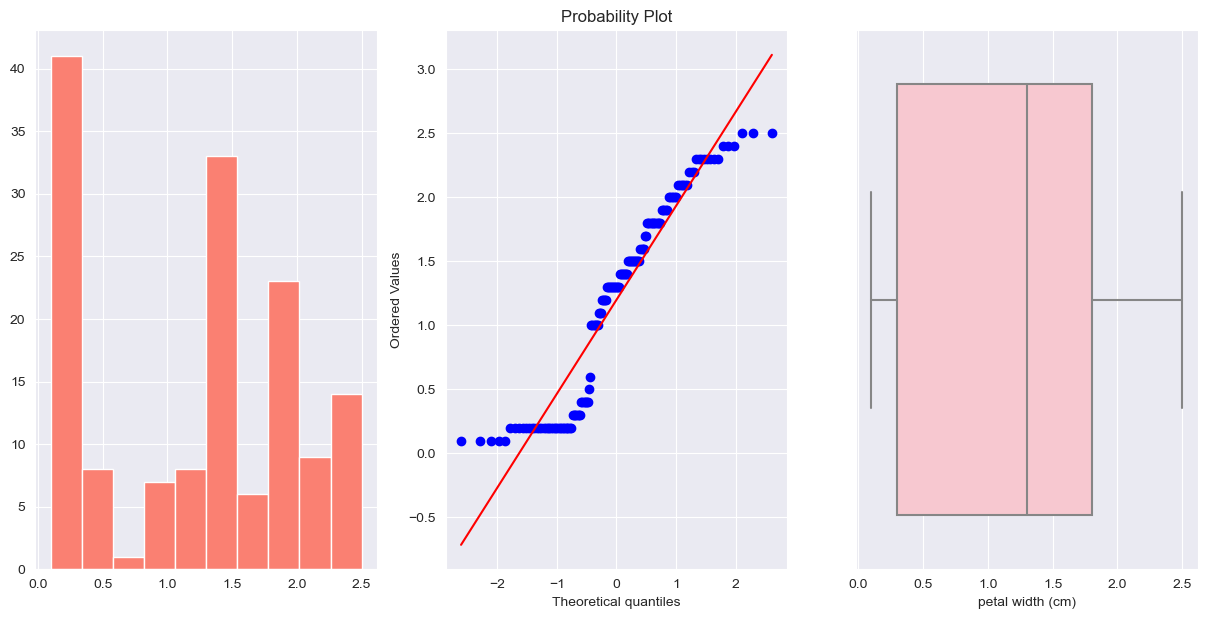

------------------------------------------------------------


In [36]:
for i in dat.columns:
    print(f' Statistical Plots for the Feature : {i} are shown ↓')
    makeplots(i)
    print("-"*60)

<h2> Building the clustering model </h2>

<p> To proceed with the clustering model build, we will perform the following:

    * Check the nature of the data if it is valid for clustering using Hopkins score
    * If valid, then we will perform the clustering
    * Where posible visualise the clustering
    
  <b> For details on Hopkins score see [Here](https://www.datanovia.com/en/lessons/assessing-clustering-tendency/) and source code for the [Hopkins code](https://matevzkunaver.wordpress.com/2017/06/20/hopkins-test-for-cluster-tendency/).</b>. From our result the Hopkins score is 0.84 of which often a score above 0.80 implies the data is fit for clustering.
</p>

<h3> Perform Hopkins Score </h3>

In [38]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [47]:
scaler = StandardScaler()
datscaled = scaler.fit_transform(dat)
datscaled = pd.DataFrame(datscaled)

datscaled.shape

(150, 4)

In [48]:
hopkins(datscaled)

0.8323778201695508

<h3> K MEANS CLUSTERING </h3>

<p> To perform k-means clustering we will find the number of cluster to be used and also perform silhouette analysis before modelling.</p>

<p> From the number of cluster plot we will be using three clusters as the graph cuts at three. Similarly, considering the silhouette analysis the best values is at three clusters. </p>

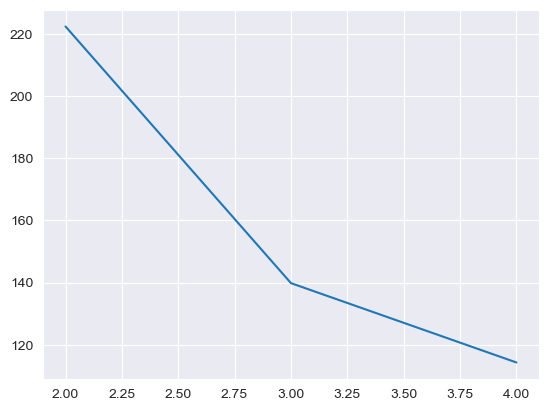

In [49]:
numclt = []
range_clusters = [2, 3, 4]
for num_clusters in range_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(datscaled)
    
    numclt.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(range_clusters, numclt)
plt.show()

In [50]:
# silhouette analysis
range_clusters = [2, 3, 4]

for num_clusters in range_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(datscaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(datscaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5817500491982808
For n_clusters=3, the silhouette score is 0.45994823920518635
For n_clusters=4, the silhouette score is 0.383850922475103


In [73]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(datscaled)

KMeans(max_iter=50, n_clusters=3)

In [74]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [75]:
dat["cluster_id"] = kmeans.labels_

In [76]:
dat.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   cluster_id  
0           2  
1           2  
2           2  
3           2  
4           2

In [79]:
print(kmeans.cluster_centers_)

[[ 1.13597027  0.08842168  0.99615451  1.01752612]
 [-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]]


In [77]:
dat.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'cluster_id'],
      dtype='object')

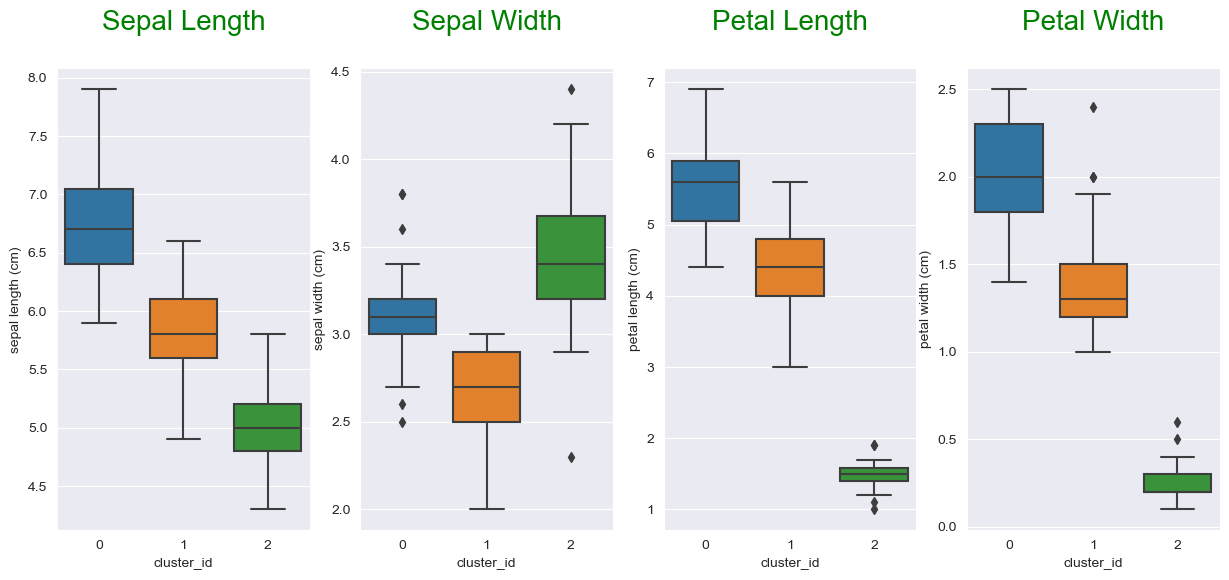

In [78]:
plt.figure(figsize=(15,6))

plt.subplot(1,4,1)
sns.boxplot(y = dat['sepal length (cm)'], x = dat['cluster_id'])
plt.title("Sepal Length\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,4,2)
sns.boxplot(y = dat['sepal width (cm)'], x = dat['cluster_id'])
plt.title("Sepal Width\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,4,3)
sns.boxplot(y = dat['petal length (cm)'], x = dat['cluster_id'])
plt.title("Petal Length\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,4,4)
sns.boxplot(y = dat['petal width (cm)'], x = dat['cluster_id'])
plt.title("Petal Width\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()


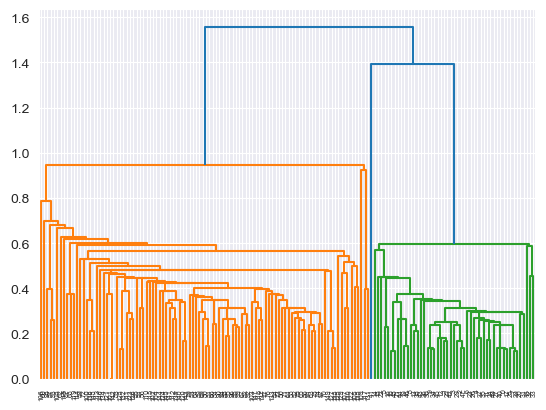

In [85]:
#Hierachical modeling
# single linkage
mergings = linkage(datscaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

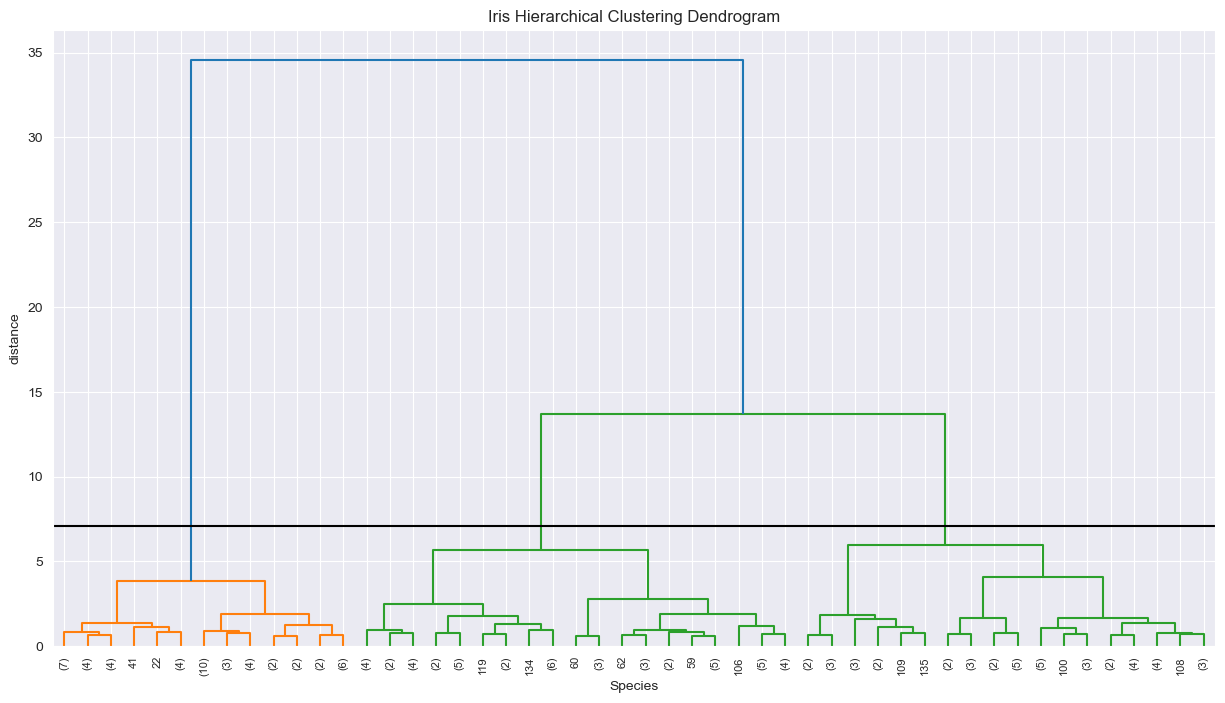

In [90]:
#Hierachy Clustering 
hier=linkage(dat,"ward")
max_d=7.08
plt.figure(figsize=(15,8))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('distance')
dendrogram(
    hier,
    truncate_mode='lastp',  
    p=50,                  
    leaf_rotation=90.,      
    leaf_font_size=8.,     
)
plt.axhline(y=max_d, c='k')
plt.show()

<h3> Following are the 3 clusters formed </h3>

* cluster no. 0 : small Sepal Length, large sepal width, small petal length, small petal width. <br> 
* cluster no. 1 : moderate sepal length, small sepal width, moderate petal length, moderate petal width <br>
* cluster no. 2 : large sepal length, moderate sepal width, large petal length, large petal width